# <center>3ª Atividade de Aprendizado de Máquina</center>
# <center>Modelos Preditivos</center>
### <center><b><i>Anderson Martins Gomes</i></b></center>
## <center>Programa de Pós-graduação em Ciência da Computação - PPGCC/UECE</center>
### <center><i>andersonmg@gmail.com</i></center>

## <center><b>Resumo</b></center>
<p style="margin-left: 50px; margin-right: 50px; text-align: justify">Neste trabalho são realizados experimentos para se comparar cinco modelos preditivos vistos na disciplina de Aprendizado de Máquina (KNN, Naive Bayes, Árvore de Decisão, MLP e SVM) e seus resultados na resolução de um problema de classificação. Para tal, será utilizada a base de dados <i>UCI Machine Learning Repository: Wine Quality Data Set</i>. Esse conjunto apresenta informações relacionadas à qualidade de vinhos brancos e tintos. Na análise, optou-se exclusivamente pelo subconjunto dos vinhos tintos, pretendo-se prever sua qualidade a partir das características disponíveis. Para a execução e comparação dos algoritmos, utilizou-se uma biblioteca de AutoML construída pelo aluno ao longo da disciplina (GOMES, 2021). Trabalho inserido no âmbito da disciplina de Aprendizado de Máquina, professora Ana Luiza Bessa, Programa de Pós-graduação em Ciência da Computação, Universidade Estadual do Ceará.</p>

# <b>1. Introdução</b>

<p style="text-align: justify; text-indent:50px;">
Problemas de aprendizado de máquina supervisionado são aqueles nos quais é possível prever uma variável alvo a partir de outras existentes no <i>dataset</i> de referência. As tarefas supervisionadas se distinguem pelo tipo dos rótulos dos dados: discreto, no caso de classificação; e contínuo, no caso de regressão (CARVALHO, 2011, p. 6).
</p>
<p style="text-align: justify; text-indent:50px;">
Este trabalho aborda um problema de aprendizado supervisionado, especificamente de classificação, uma vez que a variável alvo (<i>target</i>) é a qualidade dos vinhos (atributo 'quality'), cujos valores pertencem a um domínio discreto, conforme demonstrado abaixo:
</p>

In [1]:
import ds_utils as util
dsWineRed = util.getDSWine_RED()
dsWineRed['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

<p style="text-align: justify; text-indent:50px;">
Para a execução dos algoritmos e comparação dos resultados, utilizou-se uma biblioteca de AutoML construída pelo aluno ao longo da disciplina (GOMES, 2021). Em linhas gerais, a biblioteca encapsula as funções básicas de preparação do <i>dataset</i>, <i>features engineering</i> e otimização de hiper-parâmetros. 
</p>
<p style="text-align: justify; text-indent:50px;">
Assim, a biblioteca se encarrega de executar as combinações entre o conjunto de features, o conjunto de algoritmos e de hiper-parâmetros, entregando os resultados conforme as métricas que forem definidas para o problema.
</p>
<p style="text-align: justify; text-indent:50px;">
Na seção pertinente serão detalhados alguns trechos principais da biblioteca de AutoML, importantes para o entendimento da resolução das questões.
</p>

# <b>2. Modelos Preditivos</b>
<p style="text-align: justify; text-indent:50px;">A seguir será realizada uma breve contextualização sobre os modelos preditivos selecionados para este trabalho.</p>
## <b>2.1 KNN</b>
<p style="text-align: justify; text-indent:50px;"></p>
## <b>2.2 Naive Bayes</b>
<p style="text-align: justify; text-indent:50px;"></p>
## <b>2.3 Árvore de Decisão</b>
<p style="text-align: justify; text-indent:50px;"></p>
## <b>2.4 MLP</b>
<p style="text-align: justify; text-indent:50px;"></p>
## <b>2.5 SVM</b>
<p style="text-align: justify; text-indent:50px;"></p>

# <b>3. Metodologia</b>
<p style="text-align: justify; text-indent:50px;">Como já explicitado na Introdução, para implementação dos experimentos, optou-se por encapsular em uma biblioteca própria, escrita em Python, as funcionalidades referentes às fases básicas de resolução de um problema de <i>Machine Learning</i>, quais sejam, o pré-processamento, a seleção de atributos, o treinamento do modelo, a otimização dos hiper-parâmetros e a obtenção dos resultados por meio das métricas de praxe.</p>
<p style="text-align: justify; text-indent:50px;">
Seguindo o comando das questões, executou-se primeiramente a rotina de AutoML para o <i>dataset</i>, as <i>features</i>, os algoritmos e os hiper-parâmetros requeridos, utilizando-se o método de <i>GridSearch</i>, que é exaustivo, ou seja, testa todas as combinações de modelos possíveis.
</p>
<p style="text-align: justify; text-indent:50px;">
Em seguida, em uma nova leva de experimentos que objetivou o atingimento de melhores resultados, executou-se a biblioteca de AutoML em suas configurações padrão principais, quais sejam:<br/>
- Inclusão de outros algoritmos de <i>Machine Learning</i>, incluindo métodos <i>ensemble</i>;<br/>
- Uso de técnicas de Engenharia de Atributos para selecionar na fase de pré-processamento as <i>features</i> mais significativas;<br/>
- Uso de algoritmo genético para seleção do sub-conjunto de algoritmo/<i>features</i> ótimo; <br/>
- Uso de busca bayesiana com validação cruzada na seleção de hiper-parâmetros;<br/>
</p>
<p style="text-align: justify; text-indent:50px;">
Ao final, comparou-se os resultados em termos das métricas solicitadas no trabalho (Acurácia, Precisão, Recall, R-score e Curva ROC), além de se incluir análises relacionadas ao tempo para treinamento, tempo para predição e uso de memória.
</p>

# <b>4. Resultados</b>

<p style="text-align: justify; text-indent:50px;">Carregando a base de dados e exibindo alguma informações básicas sobre o <i>dataset</i>:</p>

In [2]:
dsWineRed.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [3]:
dsWineRed.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
dsWineRed.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
from autoML import AutoML
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

#Definição dos classificadores conforme especificação do trabalho
#O formato de dicionário é o padrão requerido pela biblioteca AutoML.
#Nele, temos a chave como o algoritmo classificador e o valor como um dicionário com as configurações dos hiper-parâmetros pertinentes.
ALGORITHMS = {
    KNeighborsClassifier:{
        "n_neighbors": [3,11,17] #Utilizando três diferentes valores de K
        , "metric": ['euclidean', 'manhattan', 'minkowski'] #Utilizando três diferentes métricas de distâncias
        , "n_jobs": [-1] #Utilizando todas as possibilidades de número de jobs
        },
    GaussianNB:{ #Naive Bayes com distribuição gaussiana
        "priors": [None], #Não há variação de parâmetros para este algoritmo
        },
    MultinomialNB:{ #Naive Bayes com distribuição multinomial
        "alpha": [1.0], #Não há variação de parâmetros para este algoritmo
        },
    BernoulliNB:{ #Naive Bayes com distribuição Bernoulli
        "alpha": [1.0], #Não há variação de parâmetros para este algoritmo
        },
    DecisionTreeClassifier:{
        "criterion": ["gini", "entropy"], #Utilizando índice Gini e Entropia para o cálculo de qualidade da divisão dos nós
        },
    MLPClassifier:{
        "learning_rate": ['constant', 'invscaling', 'adaptive'], #Utilizando diferentes valores de taxa de aprendizagem
        'momentum' : [0.1, 0.5, 0.9], #Utilizando diferentes valores de momentum
        },        
    SVC:{
        "kernel": ['linear', 'rbf', 'poly'], #Utilizando diferentes kernels
        "C": [0.001, 1, 1000], #Utilizando diferentes valores de C
        "gamma": ["auto", "scale"], #Utilizando diferentes valores de gamma
        "degree": [1, 3, 5], #Utilizando diferentes valores de grau
        "probability": [True] #Utilizando a probabilidade
        },
}

METRICS = ['accuracy', 'f1', 'precision', 'recall', 'roc_auc'] #Definição das métricas utilizadas

<p style="text-align: justify; text-indent:50px;">
Com os parâmetros básicos definidos, tem-se a criação do objeto de AutoML. Em sua instanciação já é executada uma série de operações de pré-processamento. As principais encontram-se detalhadas abaixo (para uma referência completa, ver (GOMES, 2021)):
</p>

<b>Exclusão de valores faltantes:</b>
```python
    print('Original dataset dimensions:', ds_source.shape)
    #NaN values
    ds = ds_source.dropna()
    print('Dataset dimensions after drop NaN values:', ds.shape)
    #shuffle data to minimize bias tendency
    ds = ds.sample(frac=1)
```
<b>Processando o <i>target</i>, selecionando o tipo de problema e as métricas a serem utilizadas:</b>
```python
    #setting Y
    self.y_colname = y_colname
    self.y_full = ds[[self.y_colname]]
    self.__y_encoder = None
    self.y = np.asanyarray(self.y_full).reshape(-1, 1).ravel()
    self.y_is_binary = False
    self.y_classes = None
    if self.YisCategorical():
        print('ML problem type: Classification')
        #encoding
        self.__y_encoder = OrdinalEncoder(dtype=int)
        self.y_full = pd.DataFrame(self.__y_encoder.fit_transform(self.y_full), columns=[self.y_colname])
        self.y_classes = np.sort(self.y_full[self.y_colname].unique())
        self.y_is_binary = len(self.y_classes) == 2
        if not self.y_is_binary: #multiclass 
            #adjusting the metrics for multiclass target
            for i, m in enumerate(self.metrics_classification_list):
                if m == 'f1':
                    self.metrics_classification_list[i] = 'f1_weighted'
                elif m == 'roc_auc':
                    self.metrics_classification_list[i] = 'roc_auc_ovr_weighted'
                elif m == 'accuracy':
                    self.metrics_classification_list[i] = 'balanced_accuracy'
                elif m == 'recall':
                    self.metrics_classification_list[i] = 'recall_weighted'
                elif m == 'precision':
                    self.metrics_classification_list[i] = 'precision_weighted'
    else:
        print('ML problem type: Regression')

    print('   Applied metrics:', self.metrics_classification_list)
```  
<b>Processando as <i>features</i> e transformando as variáveis categóricas por meio da técnica de <i>One Hot Encoder</i>:</b>
```python
    #setting X
    self.X = ds.drop(self.y_colname, axis=1)
    self.__onehot_encoder = OneHotEncoder(sparse=False, dtype=int)

    hot_columns = []
    str_columns = []
    for i, col in enumerate(self.X.columns):
        if self.X.dtypes[i] == object: 
            if len(self.X[col].unique()) <= self.__unique_categoric_limit:
                hot_columns.append(col)
            else:
                str_columns.append(col)
    
    if len(str_columns) > 0:
        self.X = self.X.drop(str_columns, axis=1)
        
    if len(hot_columns) > 0:
        print('One hot encoder columns:', hot_columns)
        self.__onehot_encoder.fit(self.X[hot_columns])
        
        hot_cols_names = []
        
        for i, name in enumerate(self.__onehot_encoder.feature_names_in_):
            for cat in self.__onehot_encoder.categories_[i]:
                hot_cols_names.append(name + '_' + cat.lower().replace(' ','_'))
                
        self.X = pd.concat([self.X.drop(hot_columns, axis=1)
                            , pd.DataFrame(self.__onehot_encoder.transform(self.X[hot_columns])
                                        , columns=hot_cols_names)], axis=1)
```  
<b>Normalizando o <i>X</i> e dividindo o <i>dataset</i> em porções de treino e teste:</b>
```python
    #normalizing the variables
    print('Normalizing the variables...')
    self.scaler = preprocessing.MinMaxScaler()
    self.X = pd.DataFrame(self.scaler.fit_transform(self.X), columns=self.X.columns) 

    #splitting dataset
    print('Splitting dataset...')
    self.X_train, self.X_test, self.y_train, self.y_test = self.__train_test_split()
    print('   X_train dimensions:', self.X_train.shape)
    self.y_train = np.asanyarray(self.y_train).reshape(-1, 1).ravel()
    self.y_test = np.asanyarray(self.y_test).reshape(-1, 1).ravel()
```  
<b>Realizando o <i>features engineering</i>, caso o AutoML tenha sido configurado para isto.</b> 
<p style="text-align: justify; text-indent:50px;">
São realizados dois tipos de processamento. No primeiro compara-se a correlação de cada feature com o Y. Caso não esteja acima de um determinado limite (variável <i>self.__min_x_y_correlation_rate</i>), a coluna é descartada. Na outra abordagem, testa-se cada variável com as outras. Caso a correlação esteja acima de um determinado nível (1 - o valor da variável <i>self.__min_x_y_correlation_rate</i>), considera-se as <i>features</i> redundantes, excluindo-se uma delas.
</p>

```python

    def features_corr_level_Y(i, X, y, threshold):
        #features engineering
        #testing correlation between X and Y
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            corr = sta.pearsonr(X, y)[0]
        if ( (corr != corr) #NaN value for correlation because constant feature
            or (abs(corr) < threshold)
            ):
            return None#x[i] below the threshold
        #else: feature ok with Y
        return i

    def features_corr_level_X(i, X_0, X_i, threshold):
        #features engineering
        #testing correlation between X_0 and X_i
        for i in range(0, X_i.shape[1]):
            with warnings.catch_warnings():
                warnings.simplefilter("ignore")
                corr = sta.pearsonr(X_0, X_i.iloc[:,i])[0]
            if ( (corr != corr) #NaN value for correlation because constant feature
                or (abs(corr) > threshold)
                ):
                return None#x[i] above the threshold
        #else: feature ok, no redundance
        return i

    #running feature engineering in paralel
    if features_engineering:
        n_cols = self.X_train.shape[1]
        print('Features engineering - Testing correlation with Y...')
        considered_features = Parallel(n_jobs=-1, backend="multiprocessing")(delayed(features_corr_level_Y)
                                (i
                                , self.X_train.iloc[:,i]
                                , self.y_train
                                , self.__min_x_y_correlation_rate)
                                for i in range(0, n_cols))
        considered_features = [x for x in considered_features if x is not None]
        self.X_train = self.X_train.iloc[:,considered_features]
        self.X_test = self.X_test.iloc[:,considered_features]
        
        def n_features_2str():
            return "{:.2f}".format(100*(1-len(considered_features)/self.X.shape[1])) + "% (" + str(len(considered_features)) + " remained)"
        
        print('   Features engineering - Features reduction after correlation test with Y:'
            , n_features_2str())
        
        print('Features engineering - Testing redudance between features...')    
        
        n_cols = self.X_train.shape[1]
        considered_features = Parallel(n_jobs=-1, backend="multiprocessing")(delayed(features_corr_level_X)
                                (i
                                ,self.X_train.iloc[:,i]
                                , self.X_train.iloc[:,i+1:]
                                , (1-self.__min_x_y_correlation_rate))
                                for i in range(0, n_cols-1))

        considered_features = [x for x in considered_features if x is not None]
        self.X_train = self.X_train.iloc[:,considered_features]
        self.X_test = self.X_test.iloc[:,considered_features]
        
        print('   Features engineering - Features reduction after redudance test:'
            , n_features_2str())
```

In [6]:
#Definição do objeto AutoML
automl = AutoML(dsWineRed
                , y_colname='quality' 
                , algorithms=ALGORITHMS
                , ds_name='experimento_1'
                , metrics=METRICS
                , ngen=1 #Número de gerações do algoritmo genético que otimiza a busca pela melhor combinação de features/algoritmos
                , features_engineering=False #Não fazer features engineering (usará todas as features do dataset)
                , grid_search=True #Utilizar grid search em vez de Bayesian optimization
                )

Original dataset dimensions: (1599, 12)
Dataset dimensions after drop NaN values: (1599, 12)
ML problem type: Classification
   Applied metrics: ['balanced_accuracy', 'f1_weighted', 'precision_weighted', 'recall_weighted', 'roc_auc_ovr_weighted']
Normalizing the variables...
Splitting dataset...
   X_train dimensions: (1279, 11)


<p style="text-align: justify; text-indent:50px;">
Segue-se para o treinamento propriamento dito (usando algoritmo genético) e a exibição da tabela comparativa de resultados. Abaixo reprodução dos principais trechos seguido da execução do método "getResults()".
</p>

<b>Função <i>fitness</i> do algoritmo genético:</b>

```python

def evaluation(individual, automl_obj):
    def float2bigint(float_value):
        if math.isnan(float_value):
            float_value = -1
        return [int(float_value*100000)]
    
    #print(individual)
    
    algo = individual[-automl_obj.n_bits_algos:]
    algo = bautil.ba2int(bitarray(algo)) % len(automl_obj.selected_algos)
    
    algo = automl_obj.selected_algos[algo]
    
    col_tuple = individual[:len(automl_obj.X_bitmap)-automl_obj.n_bits_algos]
    col_tuple = tuple([automl_obj.X_train.columns[i] for i, c in enumerate(col_tuple) if c == 1])
    
    if len(col_tuple)==0:
        return float2bigint(-1)
    
    def is_ensemble(a):
        return isinstance(a, VotingClassifier) or isinstance(a, StackingClassifier)
    
    if is_ensemble(algo):
        #getting the top 3 best results group by algorithm
        best_estimators = []
        automl_obj.results.sort_values(by=automl_obj.main_metric, ascending=False, inplace=True)
        for row in automl_obj.results.iterrows():
            if len(best_estimators)==3:
                break
            candidate_algo = row[1]['algorithm']
            if ((candidate_algo not in best_estimators)
                and (not is_ensemble(candidate_algo))):
                best_estimators.append(candidate_algo)
        algo.estimators = list(zip(['e'+str(i) for i in range(1,len(best_estimators)+1)],best_estimators))
        
    X_train2 = automl_obj.X_train[list(col_tuple)]
    X_test2 = automl_obj.X_test[list(col_tuple)]
    
    if len(col_tuple)==1:
        X_train2 = np.asanyarray(X_train2).reshape(-1, 1)
        X_test2 = np.asanyarray(X_test2).reshape(-1, 1)

    scoring_list = automl_obj.getMetrics()
    
    #tunning parameters
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        if automl_obj.grid_search:
            opt = GridSearchCV(estimator=algo, param_grid=automl_obj.algorithms[algo]
                                , scoring=automl_obj.main_metric
                                , cv=5
                                , verbose=0, n_jobs=-1
                                )
        else:
            opt = BayesSearchCV(estimator=algo, search_spaces=automl_obj.algorithms[algo]
                                , scoring=automl_obj.main_metric
                                , n_iter=30, cv=5
                                , verbose=0, n_jobs=-1, random_state=automl_obj.RANDOM_STATE
                                )
        opt.fit(X_train2, automl_obj.y_train)

    def fit_score():
        estimator = algo.set_params(**params)
        row = {'algorithm': estimator
               , 'params': params
               , 'features': col_tuple
               , 'n_features': len(col_tuple)
               }

        t0 = time.perf_counter()
        estimator.fit(X_train2, automl_obj.y_train)
        row['train_time'] = time.perf_counter() - t0 #train_time
        
        t0 = time.perf_counter()
        
        for scor_str in scoring_list:
            row[scor_str] = (get_scorer(scor_str)(estimator, X_test2, automl_obj.y_test))
        
        row['predict_time'] = (time.perf_counter() - t0)/len(automl_obj.y_test) #predict_time, considering one sample at a time
        
        if automl_obj.YisCategorical():
            #confusion matrix
            row['confusion_matrix'] = confusion_matrix(automl_obj.y_test, estimator.predict(X_test2), labels=automl_obj.y_classes)
        
        return row
        
    best_score = -1.0
    #dataframe format: ['algorithm', 'params', 'features', 'n_features', 'train_time', 'predict_time', 'mem_max', <metrics>]
    for params in opt.cv_results_['params']:
        #seeking for some previous result
        previous_result = automl_obj.results[(automl_obj.results['algorithm'] == algo) 
                                             & (automl_obj.results['params'] == params)
                                            & (automl_obj.results['features'] == col_tuple)]
        if previous_result.shape[0]>0:
            continue
        #else 
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            mem_max, row_result = memory_usage(proc=(fit_score)
                                                , max_usage=True
                                                , retval=True
                                                , include_children=True)
        row_result['mem_max'] = mem_max

        automl_obj.results.loc[len(automl_obj.results)] = row_result

        if row_result[automl_obj.main_metric] > best_score:
            best_score = row_result[automl_obj.main_metric]
            
        log_msg = '   *Model trained: ' + str(scoring_list[0]) 
        log_msg += ' = {:.5f}'.format(row_result[automl_obj.main_metric]) 
        log_msg += ' | ' + str(algo)[:str(algo).find('(')] 
        log_msg += ' | ' + str(len(col_tuple)) + ' features' 
        log_msg += ' | ' + str(params)[str(params).find('[')+1:str(params).find(']')]

        print(log_msg[:150].replace('\n',''))#show only the 150 first caracteres
 
    flushResults(automl_obj)
    return float2bigint(best_score) #main metric
```

<b>Função que configura a primeira geração para o algoritmo genético, forçando que todas as <i>features</i> sejam utilizadas na primeira rodada:</b>

```python
def gen_first_people(n_features, n_algos, n_bits_algos):
    first_people = []
    X_bitmap = bautil.int2ba(1, n_features)
    X_bitmap.setall(1)
    for i in range(n_algos):
        c_bitmap = []
        c_bitmap.extend(list(X_bitmap))
        c_bitmap.extend(list(bautil.int2ba(i, n_bits_algos)))
        first_people.append(c_bitmap)
    return first_people
```
<b>Função de configuração do algoritmo genético:</b>

```python
def ga_toolbox(automl_obj):
    #genetics algorithm: creating types
    creator.create("FitnessMax", base.Fitness, weights=(1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMax)
    #multiprocessing
    toolbox = base.Toolbox()
    if not(automl_obj.pool is None):
        #toolbox.register("map", pool.map) #TODO: check if it works
        pass

    #genetics algorithm: initialization
    def initPopulation(pcls, ind_init):
        return pcls(ind_init(c) for c in gen_first_people(automl_obj.X_train.shape[1], len(automl_obj.selected_algos), automl_obj.n_bits_algos))
    toolbox.register("population", initPopulation, list, creator.Individual)
    
    #genetics algorithm: operators
    toolbox.register("evaluate", evaluation, automl_obj=automl_obj)
    toolbox.register("mate", tools.cxTwoPoint)
    toolbox.register("mutate", tools.mutFlipBit, indpb=0.1)
    toolbox.register("select", tools.selTournament, tournsize=3)
    return toolbox
```



In [7]:
automl.getResults()

Selected algorithms: ['KNeighborsClassifier', 'GaussianNB', 'MultinomialNB', 'BernoulliNB', 'DecisionTreeClassifier', 'MLPClassifier', 'SVC']
Nº of training possible basic combinations: 28658.0 (4094.0 features combinations, 7 algorithms)
   *Model trained: balanced_accuracy = 0.29755 | KNeighborsClassifier | 11 features | {'metric': 'euclidean', 'n_jobs': -1, 'n_neighbors': 3
   *Model trained: balanced_accuracy = 0.26592 | KNeighborsClassifier | 11 features | {'metric': 'euclidean', 'n_jobs': -1, 'n_neighbors': 11
   *Model trained: balanced_accuracy = 0.25461 | KNeighborsClassifier | 11 features | {'metric': 'euclidean', 'n_jobs': -1, 'n_neighbors': 17
   *Model trained: balanced_accuracy = 0.28549 | KNeighborsClassifier | 11 features | {'metric': 'manhattan', 'n_jobs': -1, 'n_neighbors': 3
   *Model trained: balanced_accuracy = 0.26029 | KNeighborsClassifier | 11 features | {'metric': 'manhattan', 'n_jobs': -1, 'n_neighbors': 11
   *Model trained: balanced_accuracy = 0.24907 | KNei

,algorithm,params,features,train_time,predict_time,mem_max,balanced_accuracy,f1_weighted,precision_weighted,recall_weighted,roc_auc_ovr_weighted
0,SVC,"{'C': 1000, 'degree': 1, 'gamma': 'scale', 'ke...","11: 'fixed acidity', 'volatile acidity', 'citr...",2.047523,0.000441,1471.734375,0.362703,0.648954,0.648813,0.653125,0.786797
1,SVC,"{'C': 1000, 'degree': 5, 'gamma': 'scale', 'ke...","11: 'fixed acidity', 'volatile acidity', 'citr...",1.967825,0.000444,451.406250,0.362703,0.648954,0.648813,0.653125,0.787272
2,SVC,"{'C': 1000, 'degree': 3, 'gamma': 'scale', 'ke...","11: 'fixed acidity', 'volatile acidity', 'citr...",2.048070,0.000507,1266.363281,0.362703,0.648954,0.648813,0.653125,0.784968
3,GaussianNB,{'priors': None},"11: 'fixed acidity', 'volatile acidity', 'citr...",0.002050,0.000036,1422.550781,0.353663,0.531961,0.530392,0.540625,0.704999
4,SVC,"{'C': 1000, 'degree': 5, 'gamma': 'scale', 'ke...","11: 'fixed acidity', 'volatile acidity', 'citr...",224.794894,0.000146,449.546875,0.352929,0.641922,0.645573,0.640625,0.723009
...,...,...,...,...,...,...,...,...,...,...,...
126,SVC,"{'C': 0.001, 'degree': 3, 'gamma': 'scale', 'k...","11: 'fixed acidity', 'volatile acidity', 'citr...",0.388050,0.000588,1471.332031,0.166667,0.253509,0.180625,0.425000,0.719645
127,SVC,"{'C': 0.001, 'degree': 5, 'gamma': 'auto', 'ke...","11: 'fixed acidity', 'volatile acidity', 'citr...",0.355525,0.000597,1471.500000,0.166667,0.253509,0.180625,0.425000,0.707729
128,SVC,"{'C': 0.001, 'degree': 3, 'gamma': 'auto', 'ke...","11: 'fixed acidity', 'volatile acidity', 'citr...",0.381928,0.000606,1470.628906,0.166667,0.253509,0.180625,0.425000,0.711254
129,SVC,"{'C': 0.001, 'degree': 1, 'gamma': 'auto', 'ke...","10: 'fixed acidity', 'volatile acidity', 'citr...",0.361121,0.000614,1229.910156,0.166667,0.253509,0.180625,0.425000,0.702277


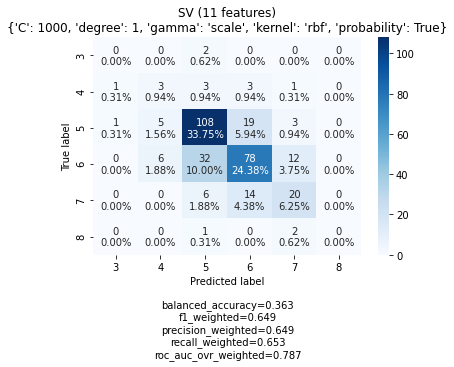

In [8]:
automl.getBestConfusionMatrix();

<p style="text-align: justify; text-indent:50px;">
Executando novo experimento, agora com as configurações do AutoML permitindo o uso de outros algoritmos (16 no total), incluindo <i>ensembles</i>, e com inúmeras configurações de hiper-parâmetros otimizados por meio do método BayesSearchCV. Além disso, habilitou-se o recurso de engenharia de atributos e se configurou o algoritmo genético com o limite de apenas 5 gerações, considerando a alta exigência computacional. 
</p>

<p style="text-align: justify; text-indent:50px;">
Abaixo o trecho de código da biblioteca de AutoML que define os algoritmos e o espaço de busca dos hiper-parâmetros:
</p>

```python
class AutoML:
    ALGORITHMS = {
        #classifiers
        #https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html
        KNeighborsClassifier(n_jobs=-1): 
            {"n_neighbors": [3,5,7,9,11,13,15,17],
             "p": [2, 3],
             },
        SVC(probability=True):
            {"C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
             "gamma": ["auto", "scale"],
             "class_weight": ["balanced", None]},
        GaussianProcessClassifier(n_jobs=-1):{
            "copy_X_train": [False],
            "warm_start": [True, False],},
        DecisionTreeClassifier():{
            "criterion": ["gini", "entropy"],
            },
        RandomForestClassifier(n_jobs=-1):{
            "n_estimators": [120,300,500,800,1200],
            "max_depth": [None, 5, 8, 15, 20, 25, 30],
            "min_samples_split": [2, 5, 10, 15, 100],
            "min_samples_leaf": [1, 2, 5, 10],
            "max_features": [None, "sqrt", "log2"],
            },
        MLPClassifier():{
            "learning_rate": ['constant', 'invscaling', 'adaptive'], 
            'momentum' : [0.1, 0.5, 0.9], 
            },
        AdaBoostClassifier():{
            "algorithm": ["SAMME", "SAMME.R"],
            },
        GaussianNB():{
            "priors": [None],
            },
        QuadraticDiscriminantAnalysis():{
            "priors": [None],
            },
        XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'):{
            "eta": [0.01, 0.015, 0.025, 0.05, 0.1],
            "gamma": [0.05, 0.1, 0.3, 0.5, 0.7, 0.9, 1],
            "max_depth": [3, 5, 7, 9, 12, 15, 17, 25],
            "min_child_weight": [1, 3, 5, 7],
            "subsample": [0.6, 0.7, 0.8, 0.9, 1],
            "colsample_bytree": [0.6, 0.7, 0.8, 0.9, 1],
            "lambda": [0.01,0.1,1],
            "alpha": [0, 0.1, 0.5, 1],
            },
        MultinomialNB():{
            "fit_prior": [True, False],
            }, 
        GradientBoostingClassifier():{
            "loss": ["deviance"],
            },
        HistGradientBoostingClassifier():{
            "warm_start": [True, False],
            },
        #TPOTClassifier(verbosity=0, n_jobs=-1):{},
        linear_model.LinearRegression(n_jobs=-1):{
            "fit_intercept": [True, False],
            },
        linear_model.LogisticRegression(n_jobs=-1):{
            "C": [0.001, 0.01, 0.1, 1, 10,
                  100, 1000],
            },
        VotingClassifier(estimators=[], n_jobs=-1):{
            "voting": ["soft"],
            },
        StackingClassifier(estimators=[], n_jobs=-1):{
            "stack_method": ["auto"],
            },
        #regressors        
        XGBRegressor():{},
        XGBRFRegressor():{},
        svm.SVR():{},
        tree.DecisionTreeRegressor():{},
        neighbors.KNeighborsRegressor():{},
        GradientBoostingRegressor():{},    
    }  
```    

<p style="text-align: justify; text-indent:50px;">
Construtor da classe com as configurações padrão:
</p>

```python
    def __init__(self, ds_source, y_colname = 'y'
                 , algorithms = ALGORITHMS
                 , unique_categoric_limit = 10 
                 , min_x_y_correlation_rate = 0.01
                 , pool = None
                 , ds_name = None
                 , ngen = 10
                 , metrics = None
                 , features_engineering = True
                 , grid_search = False
                 ) -> None:
```

In [9]:
automl2 = AutoML(dsWineRed
                , y_colname='quality' 
                , ds_name='experimento_2'
                , metrics=METRICS #mesmas métricas definidas originalmente para o experimento 1
                , ngen=5 #Número de gerações do algoritmo genético que otimiza a busca pela melhor combinação de features/algoritmos
                , n_inter_bayessearch=10 #Número de iterações do Bayesian optimization
                )
automl2.getResults()

Original dataset dimensions: (1599, 12)
Dataset dimensions after drop NaN values: (1599, 12)
ML problem type: Classification
   Applied metrics: ['balanced_accuracy', 'f1_weighted', 'precision_weighted', 'recall_weighted', 'roc_auc_ovr_weighted']
Normalizing the variables...
Splitting dataset...
   X_train dimensions: (1279, 11)
Features engineering - Testing correlation with Y...
   Features engineering - Features reduction after correlation test with Y: 0.00% (11 remained)
Features engineering - Testing redudance between features...
   Features engineering - Features reduction after redudance test: 9.09% (10 remained)
Selected algorithms: ['KNeighborsClassifier', 'SVC', 'GaussianProcessClassifier', 'DecisionTreeClassifier', 'RandomForestClassifier', 'MLPClassifier', 'AdaBoostClassifier', 'GaussianNB', 'QuadraticDiscriminantAnalysis', 'XGBClassifier', 'MultinomialNB', 'GradientBoostingClassifier', 'HistGradientBoostingClassifier', 'LogisticRegression', 'VotingClassifier', 'StackingCla

,algorithm,params,features,train_time,predict_time,mem_max,balanced_accuracy,f1_weighted,precision_weighted,recall_weighted,roc_auc_ovr_weighted
0,SVC,"{'C': 100.0, 'class_weight': 'balanced', 'gamm...","10: 'sulphates', 'pH', 'density', 'total sulfu...",0.556295,0.000534,1458.242188,0.467461,0.596307,0.614662,0.587500,0.760684
1,SVC,"{'C': 1000.0, 'class_weight': None, 'gamma': '...","10: 'sulphates', 'pH', 'density', 'total sulfu...",2.156488,0.000430,1457.871094,0.453702,0.617882,0.619352,0.621875,0.757280
2,SVC,"{'C': 1000.0, 'class_weight': None, 'gamma': '...","8: 'sulphates', 'pH', 'total sulfur dioxide', ...",2.174009,0.000405,2270.093750,0.453474,0.601436,0.605105,0.600000,0.728967
3,SVC,"{'C': 1000.0, 'class_weight': None, 'gamma': '...","9: 'sulphates', 'pH', 'total sulfur dioxide', ...",2.261879,0.000423,2268.335938,0.451252,0.600663,0.610816,0.593750,0.716872
4,SVC,"{'C': 100.0, 'class_weight': 'balanced', 'gamm...","7: 'sulphates', 'pH', 'total sulfur dioxide', ...",0.560003,0.000464,2270.484375,0.440286,0.514187,0.548120,0.496875,0.722654
...,...,...,...,...,...,...,...,...,...,...,...
246,SVC,"{'C': 0.001, 'class_weight': None, 'gamma': 'a...","6: 'sulphates', 'pH', 'total sulfur dioxide', ...",0.296152,0.000510,2291.687500,0.166667,0.253509,0.180625,0.425000,0.604695
247,SVC,"{'C': 0.001, 'class_weight': None, 'gamma': 'a...","9: 'sulphates', 'pH', 'total sulfur dioxide', ...",0.312994,0.000511,2267.644531,0.166667,0.253509,0.180625,0.425000,0.648988
248,SVC,"{'C': 0.001, 'class_weight': None, 'gamma': 'a...","7: 'sulphates', 'pH', 'density', 'total sulfur...",0.299310,0.000540,2278.519531,0.166667,0.253509,0.180625,0.425000,0.653675
249,SVC,"{'C': 0.001, 'class_weight': None, 'gamma': 'a...","10: 'sulphates', 'pH', 'density', 'total sulfu...",0.336545,0.000557,1459.097656,0.166667,0.253509,0.180625,0.425000,0.655921


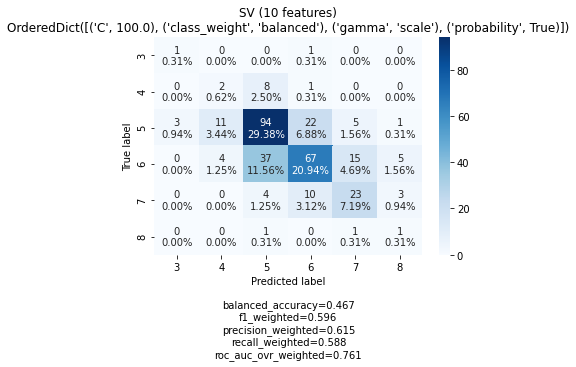

In [10]:
automl2.getBestConfusionMatrix();

# desbalanceamento do dataset

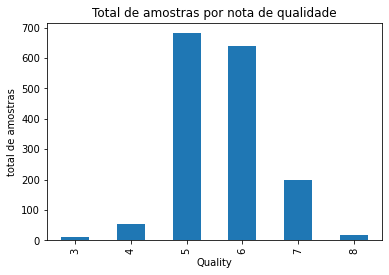

In [11]:
dist_classes = dsWineRed.quality.value_counts().sort_index()
# Mostra gráfico a dirtibuição de amostras por rótulo da variável dependente("target")
dist_classes.plot(xlabel='Quality', ylabel='total de amostras'
                              , kind='bar',title='Total de amostras por nota de qualidade');

In [12]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# Atribuir valores para X e y
X = dsWineRed.iloc[:,:-1]
y = dsWineRed.quality

# Mostrar as dimensões de X e y
print('Dimensões de X = ', X.shape)
print('Dimensões de y = ', y.shape)

over = RandomOverSampler(random_state=0)

X_resampled, y_resampled = over.fit_resample(X, y)

# Mostrar as dimensões de X e y
print('Dimensões de X_resampled = ', X_resampled.shape)
print('Dimensões de y_resampled = ', y_resampled.shape)

Dimensões de X =  (1599, 11)
Dimensões de y =  (1599,)
Dimensões de X_resampled =  (4086, 11)
Dimensões de y_resampled =  (4086,)


In [13]:
import pandas as pd
df_oversampled = pd.DataFrame(X_resampled)
df_oversampled['target']= y_resampled
df_oversampled.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
2502,5.7,1.13,0.09,1.5,0.172,7.0,19.0,0.99400,3.50,0.48,9.8,4
311,7.9,0.53,0.24,2.0,0.072,15.0,105.0,0.99600,3.27,0.54,9.4,6
383,8.3,0.26,0.42,2.0,0.080,11.0,27.0,0.99740,3.21,0.80,9.4,6
1182,10.2,0.40,0.40,2.5,0.068,41.0,54.0,0.99754,3.38,0.86,10.5,6
2883,8.8,0.61,0.30,2.8,0.088,17.0,46.0,0.99760,3.26,0.51,9.3,4


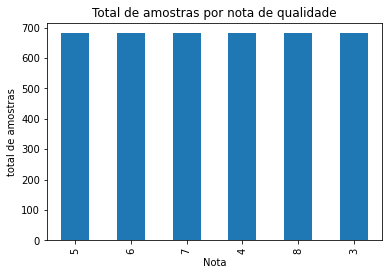

In [14]:
# Mostra gráfico a distribuição de amostras por rótulo da variável dependente("target")
df_oversampled.target.value_counts().plot(xlabel='Nota', ylabel='total de amostras'
                              , kind='bar',title='Total de amostras por nota de qualidade');

In [15]:
automl3 = AutoML(df_oversampled
                , y_colname='target' 
                , ds_name='experimento_3'
                , metrics=METRICS #mesmas métricas definidas originalmente para o experimento 1
                , ngen=5 #Número de gerações do algoritmo genético que otimiza a busca pela melhor combinação de features/algoritmos
                , n_inter_bayessearch=10 #Número de iterações do Bayesian optimization
                )
automl3.getResults()

Original dataset dimensions: (4086, 12)
Dataset dimensions after drop NaN values: (4086, 12)
ML problem type: Classification
   Applied metrics: ['balanced_accuracy', 'f1_weighted', 'precision_weighted', 'recall_weighted', 'roc_auc_ovr_weighted']
Normalizing the variables...
Splitting dataset...
   X_train dimensions: (3268, 11)
Features engineering - Testing correlation with Y...
   Features engineering - Features reduction after correlation test with Y: 0.00% (11 remained)
Features engineering - Testing redudance between features...
   Features engineering - Features reduction after redudance test: 9.09% (10 remained)
Selected algorithms: ['KNeighborsClassifier', 'SVC', 'GaussianProcessClassifier', 'DecisionTreeClassifier', 'RandomForestClassifier', 'MLPClassifier', 'AdaBoostClassifier', 'GaussianNB', 'QuadraticDiscriminantAnalysis', 'XGBClassifier', 'MultinomialNB', 'GradientBoostingClassifier', 'HistGradientBoostingClassifier', 'LogisticRegression', 'VotingClassifier', 'StackingCla

,algorithm,params,features,train_time,predict_time,mem_max,balanced_accuracy,f1_weighted,precision_weighted,recall_weighted,roc_auc_ovr_weighted
0,StackingClassifier,"{'n_jobs': -1, 'stack_method': 'auto'}","10: 'sulphates', 'pH', 'density', 'total sulfu...",36.543684,0.001389,2642.253906,0.915441,0.915960,0.917512,0.915648,0.987870
1,StackingClassifier,"{'n_jobs': -1, 'stack_method': 'auto'}","9: 'sulphates', 'pH', 'density', 'total sulfur...",28.656864,0.001217,2712.066406,0.914216,0.914496,0.915596,0.914425,0.988123
2,StackingClassifier,"{'n_jobs': -1, 'stack_method': 'auto'}","9: 'sulphates', 'pH', 'density', 'total sulfur...",27.241163,0.001200,2647.414062,0.911765,0.912176,0.912583,0.911980,0.988462
3,RandomForestClassifier,"{'max_depth': None, 'max_features': 'sqrt', 'm...","10: 'sulphates', 'pH', 'density', 'total sulfu...",0.805953,0.000891,2256.230469,0.899510,0.898181,0.897447,0.899756,0.986870
4,RandomForestClassifier,"{'max_depth': None, 'max_features': 'sqrt', 'm...","8: 'sulphates', 'density', 'free sulfur dioxid...",0.719237,0.000839,2399.183594,0.895833,0.894351,0.893405,0.896088,0.986743
...,...,...,...,...,...,...,...,...,...,...,...
266,MultinomialNB,{'fit_prior': True},"10: 'sulphates', 'pH', 'density', 'total sulfu...",0.002129,0.000014,2322.808594,0.393731,0.382360,0.387283,0.393643,0.714917
267,MultinomialNB,{'fit_prior': False},"10: 'sulphates', 'pH', 'density', 'total sulfu...",0.002223,0.000014,2322.636719,0.392452,0.381114,0.383889,0.392421,0.714920
268,LogisticRegression,"{'C': 0.001, 'n_jobs': -1}","10: 'sulphates', 'pH', 'density', 'total sulfu...",0.016243,0.000012,2324.628906,0.382469,0.342352,0.394305,0.382641,0.732624
269,SVC,"{'C': 0.1, 'class_weight': 'balanced', 'gamma'...","10: 'sulphates', 'pH', 'density', 'total sulfu...",3.260568,0.001298,2313.625000,0.364525,0.311062,0.440767,0.365526,0.752718


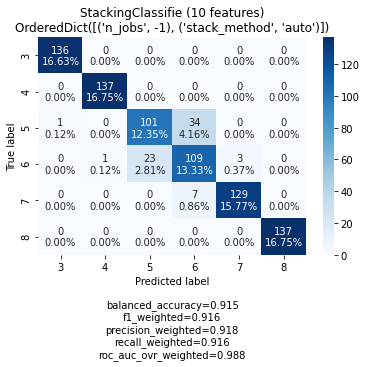

In [16]:
automl3.getBestConfusionMatrix();

In [17]:
automl3.getResults().sort_values(by=['train_order'], ascending=True)

KeyError: 'train_order'

In [ ]:
automl3.selected_algos

In [ ]:
automl3.getResults().sort_values(by=['train_order'], ascending=True).algorithm.unique()

In [ ]:
automl3.getResults().sort_values(by=['train_order'], ascending=True).algorithm[1]

In [ ]:
automl3.getResults().sort_values(by=['train_order'], ascending=True).algorithm[2]

# <b>5. Comparação entre os modelos</b>

---
### 3. Escolha um dos métodos de redução de dimensionalidade do artigo apresentado em sala de aula e faça uma comparação com a técnica PCA. Para basear sua análise, utilize, sempre que possível, os resultados obtidos nessa ati
---

# <b>Referências</b>
* GOMES, A.M. <b>Experimental Automl library, which uses genetic algorithm, multiprocessing and hyper-parameter optimization to solve supervised learning problems</b>. Disponível em <https://github.com/andersonmgomes/automl>. Acesso em: 20 dez. 2021.
* Mitchell, Tom. Machine learning. McGraw-Hill, 1997.
* CARVALHO, André, et al. Inteligência Artificial–uma abordagem de aprendizado de máquina. Rio de Janeiro: LTC, 2011.
* Bruce, Andrew, and Peter Bruce. Estatística Prática para Cientistas de Dados. Alta Books, 2019.
* https://en.wikipedia.org/wiki/Principal_component_analysis
* https://en.wikipedia.org/wiki/Dimensionality_reduction
* Ghodsi, Ali. Dimensionality Reduction A Short Tutorial. 2006.
* R.A. Johnson. Applied Multivariate Statistical Analysis. Prentice Hall, 1992.
* ANOWAR, Farzana, et al. Conceptual and empirical comparison of dimensionality reduction algorithms (PCA, KPCA, LDA, MDS, SVD, LLE, ISOMAP, LE, ICA, t-SNE). Computer Science Review, v. 40, p. 100378, 2021.
* https://en.wikipedia.org/wiki/Linear_discriminant_analysis
* https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html
* https://leandrocl2005.github.io/pca_na_mao_e_no_python/
* https://scikit-learn.org/stable/auto_examples/neighbors/plot_nca_dim_reduction.html#sphx-glr-auto-examples-neighbors-plot-nca-dim-reduction-py

In [ ]:
#%load_ext notexbook
#%texify